In [1]:
# Importing Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/HP/English_tracks_10000.csv")

In [3]:
df.head(3)

,Name,Artist,Genre,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Mode,Key
0,Blister In The Sun,Violent Femmes,acoustic,0.3160,0.726,145706,0.537,0.0,0.0707,-8.896,0.1140,96.889,0.882,71,1,0
1,I'm Yours,Jason Mraz,acoustic,0.5590,0.703,242946,0.444,0.0,0.0973,-9.331,0.0417,150.960,0.712,76,1,11
2,Love Song,Sara Bareilles,acoustic,0.0208,0.583,258826,0.786,0.0,0.1880,-3.142,0.0301,123.055,0.573,72,0,2


### Data Exploration

In [4]:
print('Number of Unique Genres are {}'.format(len(df['Genre'].unique())))

Number of Unique Genres are 100


In [5]:
print('Number of Unique Artist are {}'.format(len(df['Artist'].unique())))

Number of Unique Artist are 2175


In [6]:
df['Popularity'].value_counts()

67    308
65    289
69    264
64    259
71    258
     ... 
3       4
94      4
99      4
98      2
95      1
Name: Popularity, Length: 99, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              10000 non-null  object 
 1   Artist            10000 non-null  object 
 2   Genre             10000 non-null  object 
 3   Acousticness      10000 non-null  float64
 4   Danceability      10000 non-null  float64
 5   Duration_ms       10000 non-null  int64  
 6   Energy            10000 non-null  float64
 7   Instrumentalness  10000 non-null  float64
 8   Liveness          10000 non-null  float64
 9   Loudness          10000 non-null  float64
 10  Speechiness       10000 non-null  float64
 11  Tempo             10000 non-null  float64
 12  Valence           10000 non-null  float64
 13  Popularity        10000 non-null  int64  
 14  Mode              10000 non-null  int64  
 15  Key               10000 non-null  int64  
dtypes: float64(9), int64(4), object(3)
memory

In [8]:
df.Popularity.describe()

count    10000.000000
mean        62.318000
std         17.577382
min          0.000000
25%         53.000000
50%         65.000000
75%         75.000000
max         99.000000
Name: Popularity, dtype: float64

In [9]:
df.describe()

,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity,Mode,Key
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.288668,0.585381,2.191166e+05,0.654195,0.129516,0.196733,-7.829595,0.079690,122.308506,0.499327,62.318000,0.604500,5.404200
std,0.321286,0.170995,7.748705e+04,0.244912,0.281273,0.168824,5.010781,0.083191,28.811480,0.254017,17.577382,0.488982,3.527048
min,0.000001,0.000000,3.398700e+04,0.002680,0.000000,0.012900,-40.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012800,0.472000,1.726188e+05,0.485000,0.000000,0.095400,-9.584250,0.035700,100.011000,0.292000,53.000000,0.000000,2.000000
50%,0.141000,0.595000,2.102930e+05,0.704000,0.000055,0.126000,-6.520500,0.048800,122.503500,0.497000,65.000000,1.000000,6.000000
75%,0.528000,0.713000,2.489025e+05,0.860000,0.025300,0.246000,-4.588500,0.082900,139.920250,0.702000,75.000000,1.000000,9.000000
max,0.996000,0.988000,1.282000e+06,1.000000,0.991000,0.991000,0.836000,0.939000,208.426000,0.985000,99.000000,1.000000,11.000000


In [12]:
df.isnull().sum()

Name                0
Artist              0
Genre               0
Acousticness        0
Danceability        0
Duration_ms         0
Energy              0
Instrumentalness    0
Liveness            0
Loudness            0
Speechiness         0
Tempo               0
Valence             0
Popularity          0
Mode                0
Key                 0
dtype: int64

In [12]:
df.duplicated().sum()

2188

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

#### Text Cleaning/ Text Preprocessing

In [15]:
df['Name'] = df['Name'].str.lower().replace(r'\w\s',' ').replace(r'\n',' ',regex=True)

#### We have removed the duplicates from the data
#### Lets create a Genre dataframe with average popularity

In [16]:
genre = pd.DataFrame(df.groupby('Genre')['Popularity'].mean())
genre.head()

,Popularity
Genre,
acoustic,59.752809
afrobeat,65.272727
alt-rock,77.827160
alternative,79.212500
ambient,69.367647


### Data Visualization

In [17]:
top_20_genres_by_popularity = genre.sort_values(by='Popularity',ascending=False).head(20)

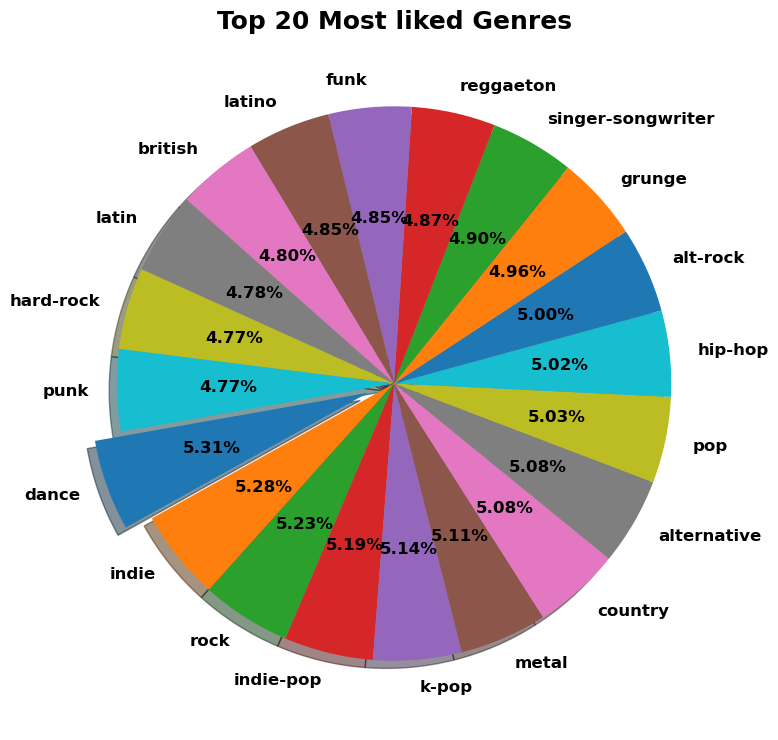

In [18]:
#Plot the top 20 genres by their average popularity

plt.figure(figsize=(16,9))
plt.pie(top_20_genres_by_popularity['Popularity'],  # Use a specific column (1D array)
        labels=top_20_genres_by_popularity.index,
        explode=[0.1] + [0.0]*19,  # Adjust for 20 genres
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops={'size': 'large', 'fontweight': 'bold', 'rotation': 0, 'color': 'black'})

plt.title("Top 20 Most liked Genres", fontsize=18, fontweight='bold')
plt.show()

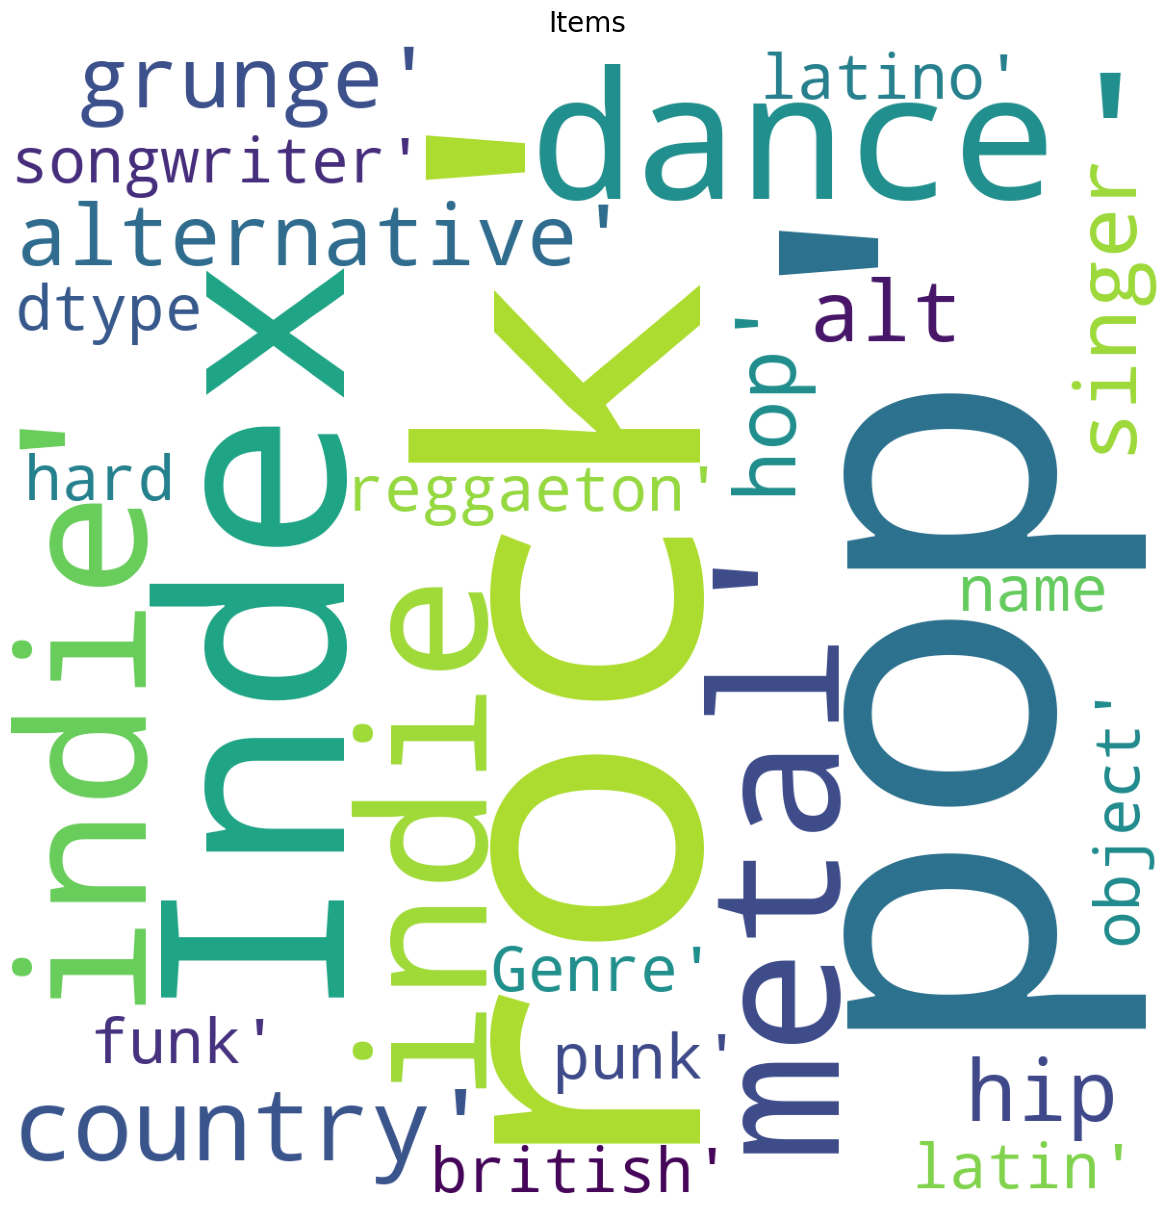

In [19]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(top_20_genres_by_popularity.index))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [20]:
import nltk
from nltk.stem.porter import PorterStemmer

In [21]:
stemmer = PorterStemmer()

In [22]:
def token(txt):
    token = nltk.word_tokenize(txt)
    a = [stemmer.stem(w) for w in token]
    return " ".join(a)

In [23]:
token("you are beautiful, beauty")

'you are beauti , beauti'

In [24]:
df['Name'].apply(lambda x: token(x))

0                    blister in the sun
1                             i 'm your
2                             love song
3                               hold on
4                             i 'm your
                     ...               
9993                          americana
9994                  get up , stand up
9995                             infect
9997                   stori of my life
9998    dani / uma brasileira - ao vivo
Name: Name, Length: 7812, dtype: object

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
tfid = TfidfVectorizer(analyzer='word', stop_words='english')

In [27]:
matrix = tfid.fit_transform(df['Name'])

In [28]:
similer = cosine_similarity(matrix)

In [29]:
similer[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [30]:
df['Name']

0                    blister in the sun
1                             i'm yours
2                             love song
3                               hold on
4                             i'm yours
                     ...               
9993                          americana
9994                   get up, stand up
9995                           infected
9997                   story of my life
9998    dani / uma brasileira - ao vivo
Name: Name, Length: 7812, dtype: object

In [31]:
df[df['Name']=='love song'].index[0]

2

### Recommender Function

In [32]:
def recommender(song_name):
    idx = df[df['Name']==song_name].index[0]
    distance = sorted(list(enumerate(similer[idx])),reverse=True,key = lambda x:x[1])
    song = []
    for s_id in distance[1:11]:
        song.append(df.iloc[s_id[0]].Name)
    return song

In [33]:
recommender('blister in the sun')

['sun to me',
 'the sun',
 'hard sun',
 'island in the sun',
 'island in the sun',
 'september sun',
 'island in the sun',
 'island in the sun',
 'when the sun goes down',
 'chase the sun']

In [34]:
import pickle
pickle.dump(similer,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))

In [35]:
import pickle
import streamlit as st
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

CLIENT_ID = "e249a69038cf47c68d46185cf002cad8"
CLIENT_SECRET = "d10be279d28f4edcb166dd5cbc37e997"

# Initialize the Spotify client
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_song_album_cover_url(song_name, artist_name):
    search_query = f"track:{song_name} artist:{artist_name}"
    results = sp.search(q=search_query, type="track")

    if results and results["tracks"]["items"]:
        track = results["tracks"]["items"][0]
        album_cover_url = track["album"]["images"][0]["url"]
        print(album_cover_url)
        return album_cover_url
    else:
        return "https://i.postimg.cc/0QNxYz4V/social.png"

def recommend(Name):
    index = music[music['Name'] == Name].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_music_names = []
    recommended_music_posters = []
    for i in distances[1:6]:
        # fetch the movie poster
        artist = music.iloc[i[0]].artist
        print(artist)
        print(music.iloc[i[0]].Name)
        recommended_music_posters.append(get_song_album_cover_url(music.iloc[i[0]].Name, artist))
        recommended_music_names.append(music.iloc[i[0]].Name)

    return recommended_music_names,recommended_music_posters

st.header('Music Recommender System')
music = pickle.load(open('df.pkl','rb'))
similarity = pickle.load(open('similarity.pkl','rb'))

music_list = music['Name'].values
selected_movie = st.selectbox(
    "Type or select a song from the dropdown",
    music_list
)

if st.button('Show Recommendation'):
    recommended_music_names,recommended_music_posters = recommend(selected_movie)
    col1, col2, col3, col4, col5= st.columns(5)
    with col1:
        st.text(recommended_music_names[0])
        st.image(recommended_music_posters[0])
    with col2:
        st.text(recommended_music_names[1])
        st.image(recommended_music_posters[1])

    with col3:
        st.text(recommended_music_names[2])
        st.image(recommended_music_posters[2])
    with col4:
        st.text(recommended_music_names[3])
        st.image(recommended_music_posters[3])
    with col5:
        st.text(recommended_music_names[4])
        st.image(recommended_music_posters[4])

2024-08-25 22:17:51.904 Session state does not function when running a script without `streamlit run`
